In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np

matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize']=(15,3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
grades = pd.DataFrame(
    {
        'subject': ['analízis 1', 'digitális technika 1',
                   'fizika 1', 'mikmak', 'programozás alapjai 1', 'szoftvertechnológia',
                   'bevezetés a számításelméletbe 1'],
        'grade': [5,4,3,2,5,1,4],
        'teacher':  ['a', 'b ', 'a', 'c', 'd', 'd', 'd'],
        'semester': [1,1,2,2,1,3,1],
    }
)
grades

,subject,grade,teacher,semester
0,analízis 1,5,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1
5,szoftvertechnológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


In [39]:
for i in range(grades.iloc[:,0].size):
    print(i)

0
1
2
3
4
5
6


In [3]:
grades.head()

,subject,grade,teacher,semester
0,analízis 1,5,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1


In [4]:
grades.tail(2)

,subject,grade,teacher,semester
5,szoftvertechnológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


In [5]:
grades['teacher']

0     a
1    b 
2     a
3     c
4     d
5     d
6     d
Name: teacher, dtype: object

In [6]:
grades.teacher

0     a
1    b 
2     a
3     c
4     d
5     d
6     d
Name: teacher, dtype: object

In [7]:
print(type(grades.teacher))
type(grades)

<class 'pandas.core.series.Series'>


pandas.core.frame.DataFrame

In [8]:
grades[['teacher', 'semester']]

,teacher,semester
0,a,1
1,b,1
2,a,2
3,c,2
4,d,1
5,d,3
6,d,1


In [9]:
print(type(grades[['teacher']]))
grades[['teacher']]

<class 'pandas.core.frame.DataFrame'>


,teacher
0,a
1,b
2,a
3,c
4,d
5,d
6,d


In [10]:
grades = grades.set_index('subject')

grades

,grade,teacher,semester
subject,,,
analízis 1,5,a,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechnológia,1,d,3
bevezetés a számításelméletbe 1,4,d,1


In [11]:
grades.loc['fizika 1'] #szögletes zárójel

grade       3
teacher     a
semester    2
Name: fizika 1, dtype: object

In [12]:
type(grades.loc['fizika 1']) #egy adatsor, mintha a dataframe/lista egy sora lenne

pandas.core.series.Series

In [13]:
grades.iloc[1:3] #0. 1. 2. 3. ... sorokból az 1. és 2. sorszámút kapjuk meg, loc-nál ez hibát ad

,grade,teacher,semester
subject,,,
digitális technika 1,4,b,1
fizika 1,3,a,2


In [14]:
grades.iloc[:, 0:2] #oszlop választás
grades.iloc[:, [0,2]] #ez megmondja, hogy konkrétan melyik oszlopokat akarjuk

,grade,semester
subject,,
analízis 1,5,1
digitális technika 1,4,1
fizika 1,3,2
mikmak,2,2
programozás alapjai 1,5,1
szoftvertechnológia,1,3
bevezetés a számításelméletbe 1,4,1


In [15]:
grades.iloc[:, 1:-1] #első és utolsó oszlop kivételével mind
grades.iloc[1:-1] #első és utolsó sor kivételével mind

,grade,teacher,semester
subject,,,
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechnológia,1,d,3


In [16]:
grades.iloc[1:5, 1:2] #bármi lehet

,teacher
subject,
digitális technika 1,b
fizika 1,a
mikmak,c
programozás alapjai 1,d


In [17]:
grades.iloc[[4,1,1],[2,1,2]] #egyet többször is kiválaszthatunk

,semester,teacher,semester
subject,,,
programozás alapjai 1,1,d,1
digitális technika 1,1,b,1
digitális technika 1,1,b,1


In [18]:
grades.iloc[1:12] #felfele nem csordul túl, de negatívban működik az index

,grade,teacher,semester
subject,,,
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechnológia,1,d,3
bevezetés a számításelméletbe 1,4,d,1


In [19]:
grades.loc['fizika 1','grade'] #egy mező kiválasztása az indexszel és az oszloppal

3

In [20]:
grades.semester==1

subject
analízis 1                          True
digitális technika 1                True
fizika 1                           False
mikmak                             False
programozás alapjai 1               True
szoftvertechnológia                False
bevezetés a számításelméletbe 1     True
Name: semester, dtype: bool

In [21]:
(grades.semester==1)&(grades.teacher == 'a')

subject
analízis 1                          True
digitális technika 1               False
fizika 1                           False
mikmak                             False
programozás alapjai 1              False
szoftvertechnológia                False
bevezetés a számításelméletbe 1    False
dtype: bool

In [22]:
grades[grades.semester==1]

,grade,teacher,semester
subject,,,
analízis 1,5,a,1
digitális technika 1,4,b,1
programozás alapjai 1,5,d,1
bevezetés a számításelméletbe 1,4,d,1


In [23]:
grades[(grades.semester==1)&(grades.teacher=='a')]

,grade,teacher,semester
subject,,,
analízis 1,5,a,1


In [24]:
grades[['grade','semester']]+15 #tehát művelet végezhető
#ez viszont 
#grades[['grade','teacher']]+15 

,grade,semester
subject,,
analízis 1,20,16
digitális technika 1,19,16
fizika 1,18,17
mikmak,17,17
programozás alapjai 1,20,16
szoftvertechnológia,16,18
bevezetés a számításelméletbe 1,19,16


In [25]:
grades.index.str.upper() #az index szövegeinek caps lockozása

Index(['ANALÍZIS 1', 'DIGITÁLIS TECHNIKA 1', 'FIZIKA 1', 'MIKMAK',
       'PROGRAMOZÁS ALAPJAI 1', 'SZOFTVERTECHNOLÓGIA',
       'BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1'],
      dtype='object', name='subject')

In [26]:
grades.index = grades.index.str.upper() #string függvényt így kell használni
grades

,grade,teacher,semester
subject,,,
ANALÍZIS 1,5,a,1
DIGITÁLIS TECHNIKA 1,4,b,1
FIZIKA 1,3,a,2
MIKMAK,2,c,2
PROGRAMOZÁS ALAPJAI 1,5,d,1
SZOFTVERTECHNOLÓGIA,1,d,3
BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1,4,d,1


In [27]:
grades.index = grades.index.str.lower() #string függvényt így kell használni
grades

,grade,teacher,semester
subject,,,
analízis 1,5,a,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechnológia,1,d,3
bevezetés a számításelméletbe 1,4,d,1


In [28]:
credits = pd.DataFrame(
    {
        'subject': ['analízis 1', 'fizika 1', 'programozás alapjai 2'],
        'credit': [7,5,5]
    }
)
credits

,subject,credit
0,analízis 1,7
1,fizika 1,5
2,programozás alapjai 2,5


In [29]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')

d

,grade,teacher,semester,subject,credit
0.0,5.0,a,1.0,analízis 1,7.0
NaN,4.0,b,1.0,digitális technika 1,NaN
1.0,3.0,a,2.0,fizika 1,5.0
NaN,2.0,c,2.0,mikmak,NaN
NaN,5.0,d,1.0,programozás alapjai 1,NaN
NaN,1.0,d,3.0,szoftvertechnológia,NaN
NaN,4.0,d,1.0,bevezetés a számításelméletbe 1,NaN
2.0,NaN,NaN,NaN,programozás alapjai 2,5.0


In [30]:
d = grades.merge(credits, left_index=True, right_on='subject', how='inner')

d

,grade,teacher,semester,subject,credit
0,5,a,1,analízis 1,7
1,3,a,2,fizika 1,5


In [31]:
d=d.dropna()
#dropoltuk a nan-okat tartalmazó sorokat
d

,grade,teacher,semester,subject,credit
0,5,a,1,analízis 1,7
1,3,a,2,fizika 1,5


In [14]:
grades.max().to_frame().iloc[2,0]

'd'

In [12]:
print(type(grades.max()))
grades.max() #egyes oszlopok maximuma

<class 'pandas.core.series.Series'>


subject     szoftvertechnológia
grade                         5
teacher                       d
semester                      5
dtype: object

In [33]:
grades.max(axis=1) #ezek a sorok maximumai

subject
analízis 1                         5
digitális technika 1               4
fizika 1                           3
mikmak                             2
programozás alapjai 1              5
szoftvertechnológia                3
bevezetés a számításelméletbe 1    4
dtype: int64

In [34]:
grades[['grade','semester']].idxmax() #melyik indexnél veszik fel a maximumukat, 
#ha több van akkor az elsőt választja a 2 közül

grade                analízis 1
semester    szoftvertechnológia
dtype: object

In [35]:
grades.loc[grades[['grade','semester']].idxmax()]  #ezzel megkapjuk a maxokat

,grade,teacher,semester
subject,,,
analízis 1,5,a,1
szoftvertechnológia,1,d,3


In [36]:
print(type(grades.grade.idxmax()))
grades.grade.idxmax()

<class 'str'>


'analízis 1'

In [39]:
g = credits.groupby('credit')
g.groups

{5: Int64Index([1, 2], dtype='int64'), 7: Int64Index([0], dtype='int64')}

In [40]:
credits.credit % 3 #itt 3-al való osztás maradéka szerint csoportosítottuk a sorokat, kredit szerint

0    1
1    2
2    2
Name: credit, dtype: int64

In [41]:
credits.groupby(credits.credit%3)

In [42]:
grades.groupby('semester').mean() #a szemeszterek tárgyainak jegyeinek átlaga alapján

,grade
semester,
1,4.5
2,2.5
3,1.0


In [8]:
grades.groupby(['semester','teacher']).size() #az adott csoportok elemszáma a size itt
#de ez is Series, nem frame
print(grades.iloc[:,0].size)

7


In [44]:
grades.groupby(['semester','teacher']).size().to_frame() #így DataFrame-ben ugyanaz

0
semester teacher   
1        a        1
         b        1
         d        2
2        a        1
         c        1
3        d        1

In [45]:
grades.sort_index() #index szerint rendezve

,grade,teacher,semester
subject,,,
analízis 1,5,a,1
bevezetés a számításelméletbe 1,4,d,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechnológia,1,d,3


In [47]:
grades.sort_values(['grade','semester']) #oszlopok szerint rendezve

,grade,teacher,semester
subject,,,
szoftvertechnológia,1,d,3
mikmak,2,c,2
fizika 1,3,a,2
digitális technika 1,4,b,1
bevezetés a számításelméletbe 1,4,d,1
analízis 1,5,a,1
programozás alapjai 1,5,d,1


In [48]:
grades.sort_index(ascending=False)#fordított sorrend

,grade,teacher,semester
subject,,,
szoftvertechnológia,1,d,3
programozás alapjai 1,5,d,1
mikmak,2,c,2
fizika 1,3,a,2
digitális technika 1,4,b,1
bevezetés a számításelméletbe 1,4,d,1
analízis 1,5,a,1


<AxesSubplot:>

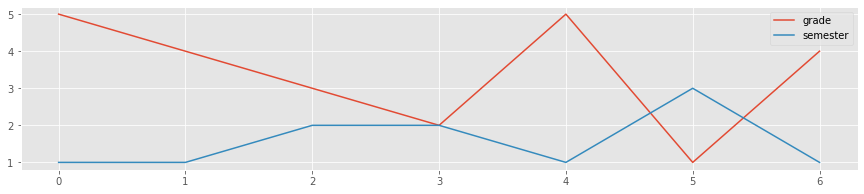

In [4]:
grades.plot()

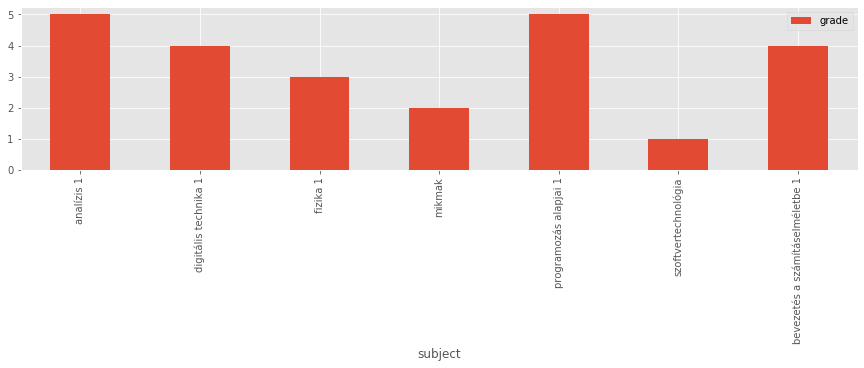

In [50]:
grades.plot(y='grade', kind='bar')

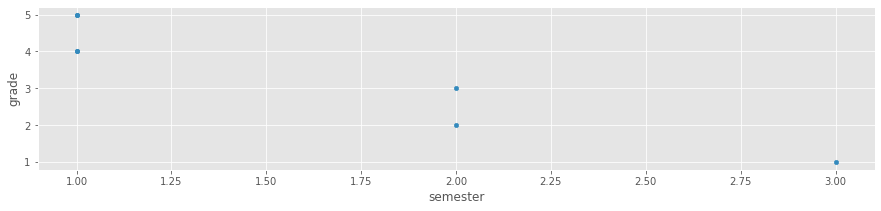

In [51]:
#x axisnak alapértelmezetten az indexet veszi, ha nem adjuk meg neki, specifikusan
grades.plot(x='semester', y='grade', kind='scatter')